In [1]:
#figures appear in notebook
%matplotlib inline 

%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

#import modsim functions
from modsim import *  
from pandas import read_html 

In [2]:
system = System(t_0 = 0,
                t_final = 1000,   #Number of time steps
                
                pop_c = 1.510,  #Specific heat of popcorn kernel (J/K)
                al_c = 0.900,   #Specific heat of aluminum pan   (J/K)
                
                pop_rate = 0.95, #Rate from experimental testing
                
                pop_sa = 0.0314,    #Surface area of kernels touching pan (m^2)
                pop_vol = 10,   #Volume of the all kernels (cm^3)
                pop_m = 10*1.05,
                
                deltat = 209.2,     #Change in temperature of popcorn kernels (C)
                
                al_k = 2.05,     #Conductivity of aluminum pan (w/mk)
                pop_k = .031,   #Conductivity of rice (w/mk)
                
                al_d = .75,       #Thickness of pan (cm)
               
                layers = 8,
                kernelsperlayer = 10)      #Mass of popcorn kernels (g)
                

state = State(kernels = system.kernelsperlayer * system.layers, #Starting number of kernels
              popped = 0,
              unpopped = 0,
              burnt = 0,
              #number of kernels in each layer
              layer1_pop = 10,
              layer2_pop = 10,
              layer3_pop = 10,
              layer4_pop = 10,
              layer5_pop = 10,
              layer6_pop = 10,
              layer7_pop = 10,
              layer8_pop = 10,
              
              #keeps track of temperature of individual layers
              al_temp = 23.,
              layer2_temp = 23.,
              layer3_temp = 23.,
              layer4_temp = 23.,
              layer5_temp = 23.,
              layer6_temp = 23.,
              layer7_temp = 23.,
              layer8_temp = 23.,
              
              #counters for keeping track of when a layer burns
              counter1 = 0,
              counter2 = 0,
              counter3 = 0,
              counter4 = 0,
              counter5 = 0,
              counter6 = 0,
              counter7 = 0,
              counter8 = 0,
              
             )
t=0

0

In [3]:
def temp_change(state, t, system):
    
    dp = 0
    
    unpack(system)
    
    #layer 1
    
    #teat transfer equation - this is the only layer which uses only conduction
    dtemp = ((al_k*(pop_sa*deltat)) / (al_d*pop_m*pop_c))
    state.al_temp += dtemp
    if state.al_temp >= 232.2:
        state.al_temp = 232.2
     
    #keeps track of when the popcorn is popping - counter value is updated to know when a layer burns
    if state.al_temp >= 180:
        state.counter1 += 1
        
        #slightly random chance of popcorn popping when a layer reaches optimal popping temperature
        if state.layer1_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped
                    
            #updating state variables        
            state.layer1_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
                    
    #burn function
    if state.counter1 == 120 and state.counter1 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 2
    
    #every other layer is the same as the first, except they also include convection as part of the temperature change over time
    dtemp2 = ((pop_k*(pop_sa*(state.al_temp-state.layer2_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.al_temp-state.layer2_temp))
    state.layer2_temp += dtemp2
    if state.layer2_temp >= 232.2:
        state.layer2_temp = 232.2

    if state.layer2_temp >= 180:
        state.counter2 += 1
        
        if state.layer2_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer2_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter2 == 120 and state.counter2 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 3    
    dtemp3 = ((pop_k*(pop_sa*(state.layer2_temp-state.layer3_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer2_temp-state.layer3_temp))
    state.layer3_temp += dtemp3
    if state.layer3_temp >= 232.2:
        state.layer3_temp = 232.2
        
    if state.layer3_temp >= 180:
        state.counter3 += 1
        
        if state.layer3_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer3_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
    
    if state.counter3 == 120 and state.counter3 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 4   
    dtemp4 = ((pop_k*(pop_sa*(state.layer3_temp-state.layer4_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer3_temp-state.layer4_temp))
    state.layer4_temp += dtemp4
    if state.layer4_temp >= 232.2:
        state.layer4_temp = 232.2
        
    if state.layer4_temp >= 180:
        state.counter4 += 1
        
        if state.layer4_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer4_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
    
    if state.counter4 == 120 and state.counter4 <121:
        change = 7
        state.popped -= change
        state.burnt += change   
        
        
 

    #layer 5 
    dtemp5 = ((pop_k*(pop_sa*(state.layer4_temp-state.layer5_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer4_temp-state.layer5_temp))
    state.layer5_temp += dtemp5
    if state.layer5_temp >= 232.2:
        state.layer5_temp = 232.2
        
    if state.layer5_temp >= 180:
        state.counter5 += 1
        
        if state.layer5_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer5_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
       
    if state.counter5 == 120 and state.counter5 <121:
        change = 7
        state.popped -= change
        state.burnt += change     
            
            
            
    #layer 6
    dtemp6 = ((pop_k*(pop_sa*(state.layer5_temp-state.layer6_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer5_temp-state.layer6_temp))
    state.layer6_temp += dtemp6
    if state.layer6_temp >= 232.2:
        state.layer6_temp = 232.2
        
    if state.layer6_temp >= 180:
        state.counter6 += 1
        
        if state.layer6_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer6_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter6 == 120 and state.counter6 <121:
        change = 7
        state.popped -= change
        state.burnt += change
        
        
        
    #layer 7
    dtemp7 = ((pop_k*(pop_sa*(state.layer6_temp-state.layer7_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer6_temp-state.layer7_temp))
    state.layer7_temp += dtemp7
    if state.layer7_temp >= 232.2:
        state.layer7_temp = 232.2
        
    if state.layer7_temp >= 180:
        state.counter7 += 1
        
        if state.layer7_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer7_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))

    if state.counter7 == 120 and state.counter7 <121:
        change = 7
        state.popped -= change
        state.burnt += change
    
    
    
    #layer 8
    dtemp8 = ((pop_k*(pop_sa*(state.layer7_temp-state.layer8_temp))) / (al_d*pop_m*pop_c)) + (.3*pop_sa*(state.layer7_temp-state.layer8_temp))
    state.layer8_temp += dtemp8
    if state.layer8_temp >= 232.2:
        state.layer8_temp = 232.2
        
    if state.layer8_temp >= 180:
        state.counter8 += 1
        
        if state.layer8_pop > 0:
            popped = 0
            for i in range (10):   
                if flip(pop_rate):
                    popped += 1
                    dp = popped

            state.layer8_pop -= 10
            state.kernels -= 10
            state.popped += (dp)
            state.unpopped += ((10 - dp))
            
    if state.counter8 == 120 and state.counter8 <121:
        change = 7
        state.popped -= change
        state.burnt += change

    
    return state

In [4]:
def run_simulation(system, temp_change):
    
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = state
    
    for t in linrange(t_0, t_final):
        frame.row[t+1] = temp_change(frame.row[t], t, system)
        
    return frame

In [5]:
results = run_simulation(system, temp_change)
results

,kernels,popped,unpopped,burnt,layer1_pop,layer2_pop,layer3_pop,layer4_pop,layer5_pop,layer6_pop,...,layer7_temp,layer8_temp,counter1,counter2,counter3,counter4,counter5,counter6,counter7,counter8
0.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,80.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,...,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def plot_results(a, b, c, d, e, f, g, h):

    plot(a, '-', label='Layer 1')
    plot(b, '-', label='Layer 2')
    plot(c, '-', label='Layer 3')
    plot(d, '-', label='Layer 4')
    plot(e, '-', label='Layer 5')
    plot(f, '-', label='Layer 6')
    plot(g, '-', label='Layer 7')
    plot(h, '-', label='Layer 8')
    decorate(xlabel='Time (seconds)',
             ylabel='Temperature (C)')

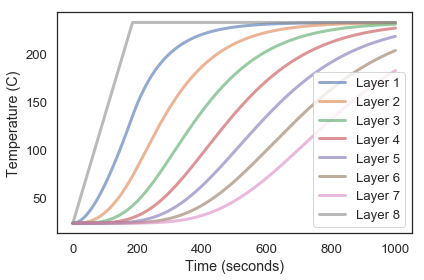

In [7]:
plot_results(results.layer2_temp,
             results.layer3_temp,
             results.layer4_temp,
             results.layer5_temp,
             results.layer6_temp,
             results.layer7_temp,
             results.layer8_temp,
             results.al_temp
            )

In [8]:
def plot_results2(a, b, c, d):

    plot(a, '-', label='Kernels')
    plot(b, '-', label='Popped')
    plot(c, '-', label='Unpopped')
    plot(d, '-', label='Burnt')

    decorate(xlabel='Time (seconds)',
             ylabel='Popcorns')

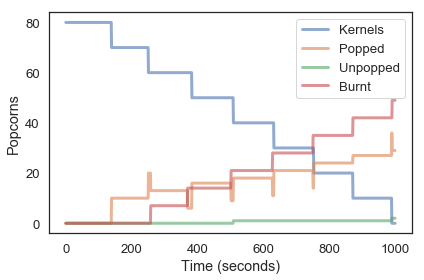

In [9]:
plot_results2(results.kernels, results.popped, results.unpopped, results.burnt)